### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [22]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics
from scipy.stats import zscore


In [31]:
df = pd.read_csv("vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [33]:
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [8]:
df = df.dropna()

In [9]:
df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

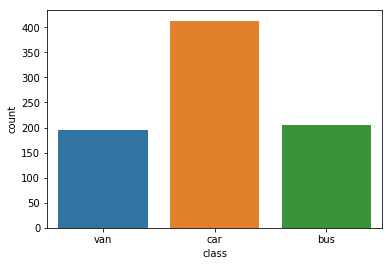

In [10]:
sns.countplot(x="class",data=df)

In [16]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [19]:
df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [24]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [25]:
df_attr= df.drop(columns="class",axis = 1)

In [26]:
df_z= df_attr.apply(zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [27]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [80]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df_z, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  cluster_errors  Avg Sil Score
0             2     9731.021918       0.365172
1             3     7192.884778       0.355589
2             4     5841.126128       0.369220
3             5     5217.187390       0.291539
4             6     4802.019102       0.250377
5             7     4437.237820       0.246590
6             8     4205.505738       0.228853
7             9     3969.773140       0.214147

In [68]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  #cluster_sil_scores.append(metrics.silhouette_score(df_z, labels, metric='euclidean'))


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

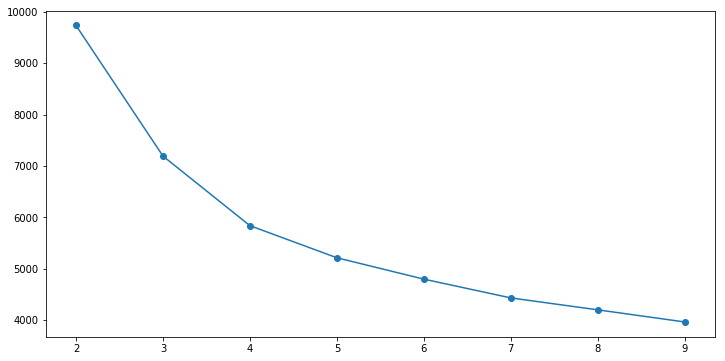

In [81]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

The optimal value visible from elbow plot is 4 as the delta after that is almost constant

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [82]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [83]:
labels = cluster.labels_                     # capture the cluster lables
centroids = cluster.cluster_centers_ 

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [84]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.207324    -0.554541             -0.291658     -0.013274   
1     1.168232     1.192886              1.226740      0.977006   
2    -0.908453    -0.532477             -0.879054     -1.071525   
3    -0.733024     0.072735             -0.272171      2.947683   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.190371                -0.171640      -0.436720   
1              0.091497                 0.225013       1.313200   
2             -0.547636                -0.298092      -0.780028   
3              6.836652                 8.696706      -0.535008   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.296555               -0.467043                  -0.520671   
1      -1.223875                1.318240                   1.108777   
2       0.863859               -0.747133                  -0.495462   
3       0.466248               -0.557406                   0.283411   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401818          -0.442431                  -0.580697   
1         1.218866           1.325155                   1.098464   
2        -0.799112          -0.783440                  -0.408880   
3         1.697528          -0.588068                   0.212701   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.651633       -0.042192          0.001576   
1                    -0.100775        0.162452          0.284996   
2                     0.743622       -0.104316         -0.284074   
3                     4.965638       -0.274839         -0.231193   

   skewness_about.2  hollows_ratio         GROUP  
0          0.850542       0.727876  2.622951e+00  
1         -0.008215       0.187400  1.130952e+00  
2         -1.014844      -1.070959 -4.218847e-15  
3         -0.707994      -0.453651  4.000000e+00

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [85]:
# Let us put the raw centroid values into a dataframe under respective columns
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction


In [86]:
df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  GROUP  
0         -0.321809       0.171837      0  
1          0.003400       0.442318      0  
2         -0.159204       0.036596      1  
3          1.629444       1.524243      0  
4         -1.460039      -1.721531      3

In [87]:
# Cound the number of records per group to check the group symmetry 

df_z.groupby("GROUP").count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              305          305                   305           305   
1              252          252                   252           252   
2              248          248                   248           248   
3                8            8                     8             8   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       305                      305            305   
1                       252                      252            252   
2                       248                      248            248   
3                         8                        8              8   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                305                     305                        305   
1                252                     252                        252   
2                248                     248                        248   
3                  8                       8                          8   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                  305                305                        305   
1                  252                252                        252   
2                  248                248                        248   
3                    8                  8                          8   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              305             305               305   
1                              252             252               252   
2                              248             248               248   
3                                8               8                 8   

       skewness_about.2  hollows_ratio  
GROUP                                   
0                   305            305  
1                   252            252  
2                   248            248  
3                     8              8

if we go by k=3 shilloute score is maximum checking results for the same 

In [76]:
dfn_z= df_attr.apply(zscore)
cluster3 = KMeans( n_clusters = 3, random_state = 1 )
cluster3.fit(dfn_z)
labels = cluster3.labels_                     # capture the cluster lables
centroids = cluster3.cluster_centers_ 
inertia_c=cluster3.inertia_

In [77]:
centroidn_df = pd.DataFrame(centroids, columns = list(dfn_z) )
centroidn_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.919871    -0.520093             -0.893208     -1.064356   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.233962    -0.573875             -0.307769     -0.030413   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.500422                -0.219074      -0.779121   
1              0.215052                 0.342508       1.271805   
2              0.205073                -0.116532      -0.459042   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.865893               -0.745356                  -0.484632   
1      -1.190612                1.275484                   1.092668   
2       0.325063               -0.487988                  -0.536044   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.782403          -0.783411                  -0.384982   
1         1.220381           1.281327                   1.079542   
2        -0.413809          -0.463663                  -0.601550   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.838787       -0.095243         -0.301716   
1                    -0.028795        0.162290          0.265665   
2                    -0.619241       -0.061780          0.010668   

   skewness_about.2  hollows_ratio  
0         -1.054206      -1.110695  
1         -0.005356       0.183801  
2          0.812786       0.698973

In [66]:
prediction=cluster3.predict(dfn_z)
dfn_z["GROUP"] = prediction
dfn_z.groupby("GROUP").count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              240          240                   240           240   
1              260          260                   260           260   
2              313          313                   313           313   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       240                      240            240   
1                       260                      260            260   
2                       313                      313            313   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                240                     240                        240   
1                260                     260                        260   
2                313                     313                        313   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                  240                240                        240   
1                  260                260                        260   
2                  313                313                        313   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              240             240               240   
1                              260             260               260   
2                              313             313               313   

       skewness_about.2  hollows_ratio  
GROUP                                   
0                   240            240  
1                   260            260  
2                   313            313

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [108]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [115]:
data = np.concatenate((a, b,c),axis =0 )

In [116]:
datan = pd.DataFrame(data)
datan.head()

0         1
0  13.882785  4.438501
1  11.687256  1.250981
2  10.316397  1.449346
3   9.837412 -2.041974
4   8.691601 -4.289773

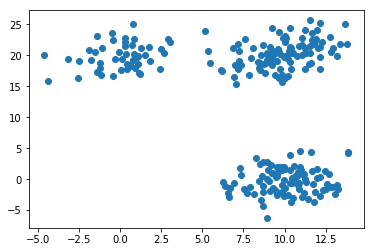

### 10. Use scatter matrix to print all the 3 distributions

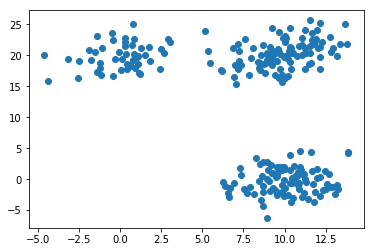

In [118]:
plt.scatter(data[:,0], data[:,1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [121]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [123]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(datan)
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(datan, 'ward')
c, coph_dists = cophenet(Z , pdist(datan))

c

0.9536963071171022

### 12. Plot the dendrogram for the consolidated dataframe

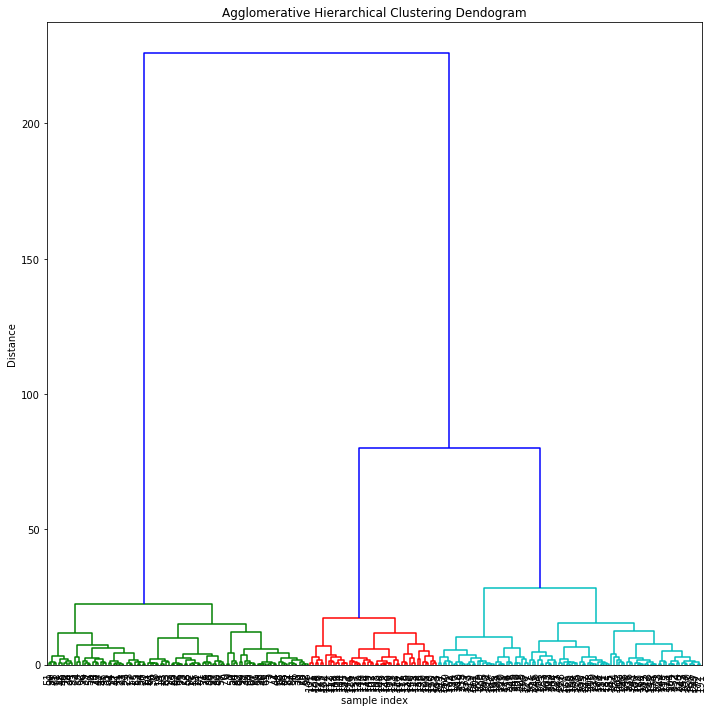

In [125]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold =40 ,leaf_font_size=10. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

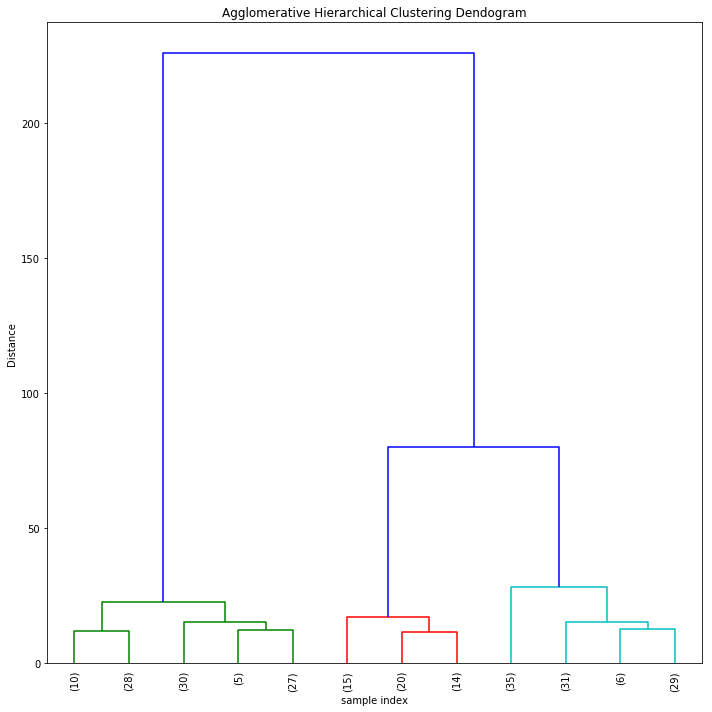

In [134]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold =50,truncate_mode='lastp',p=12 ,leaf_font_size=10. )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [138]:
max_d=50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [139]:
import scipy.cluster.hierarchy as hier

clusters = hier.fcluster(Z, max_d, criterion='distance')


In [140]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

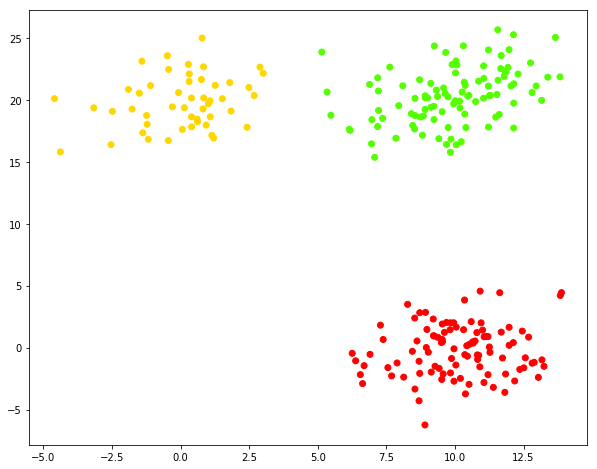

In [142]:

plt.figure(figsize=(10, 8))
plt.scatter(data[:,0], data[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()